In [142]:
from pandas import DataFrame, Series
import pandas as pd
import pyodbc
import re
import matplotlib.pyplot as plt
%matplotlib inline
from googletrans import Translator

In [7]:
path = r'C:\Data\titanic_train.csv'

In [43]:
df = pd.read_csv(path)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B834BE898>,
      dtype=object)

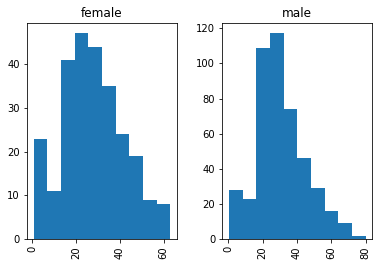

In [45]:
df.hist('Age', by='Sex')

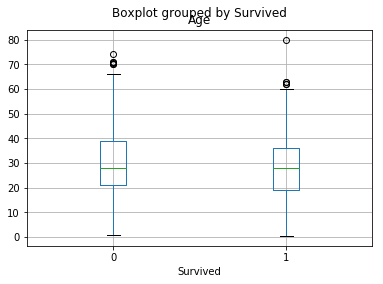

In [46]:
df.boxplot('Age', by='Survived')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
df.groupby('Embarked').count()[['PassengerId']]

,PassengerId
Embarked,
C,168
Q,77
S,644


In [49]:
#Encoding text values to prepare for any data science purposes
dfnum = pd.concat([df,pd.get_dummies(df.Embarked)], axis=1)
dfnum.drop('Embarked', axis=1, inplace=True)

In [55]:
dfnum['isFemale'] = dfnum['Sex'].map(lambda x : 1 if x == 'female' else 0)
dfnum.drop('Sex', axis=1, inplace=True)

In [69]:
dfnum.Age.fillna(value=dfnum.mean()['Age'], inplace=True)

In [70]:
dfnum.drop('Cabin', axis=1, inplace=True)

In [81]:
dfnum.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,isFemale
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,0,1,0
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,0,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1,0,0,1


In [143]:
age_labels = ['child', 'teen', 'youngAdult', 'adult', 'oldPerson']

In [144]:
age_bins = [0,12, 18, 35, 60, 100]

In [140]:
dfnum.drop('ageBin', axis=1, inplace=True)

In [145]:
dfnum['age_bin'] = pd.cut(dfnum.Age, bins=age_bins, labels=age_labels)

In [146]:
dfnum.head(10)#[['Age', 'AgeBin']]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,isFemale,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,0,1,0,youngAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,0,1,adult
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,1,youngAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1,1,youngAdult
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,0,1,0,youngAdult
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,1,0,0,youngAdult
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0,0,1,0,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,0,0,1,0,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,0,0,1,1,youngAdult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1,0,0,1,teen
